# Modélisation de la trajectoire de la Lune dans le référentiel héliocentrique

## Lois de Kepler

**1e loi :** La trajectoire d'une planète est elliptique, et le Soleil en occupe un des foyers.

**2e loi :** Dans des intervalles de temps égaux, la planète balaie des aires égales par rapport au Soleil.

**3e loi :** Pour tout objet orbitant avec une trajectoire elliptique :

$$
\frac{T^2}{a^3}=\frac{4\pi^2}{G(M+m)}
$$

où $T$ est la période de révolution en secondes, $a$ le demi-grand axe, $G$ la constante de gravitation, $m$ la masse de l'objet en mouvement, and $M$ la masse de l'objet central.

## Définition d'une ellipse

Une ellipse correspond à l'ensemble des points pour lesquels la somme des distances aux 2 foyers est égale à une constante $2a$. Certaines valeurs remarquables sont :

- $a \in \mathbb{R_+^*}$ : le demi-grand axe, la distance entre le centre et le point le plus loin,
- $b \in \mathbb{R_+^*}$ : le demi-petit axe, la distance entre le centre et le point le plus proche,
- $c \in \mathbb{R_+}$ : la distance entre le centre et un des 2 foyers *(si $c=0$, l'ellipse est un cercle)*.

Différentes équations d'une ellipse, si the demi-grand axe est parallèle à l'axe des abscisses :

$$
\left(\frac{x-x_C}{a}\right)^2 + \left(\frac{y-y_C}{b}\right)^2 = 1
$$
$$
\begin{cases}
x = x_C + a\cos{(\theta)} \\
y = y_C + b\sin{(\theta)}
\end{cases}
$$

où $(x_C;y_C)$ sont les coordonnées du centre, et $\theta \in [0;2\pi[$ l'angle formé par un point sur l'ellipse, le centre, et le demi-grand axe.

### Distance $r$ entre un point de l'ellipse $M$ et un des foyers $F$

> Démonstration à faire

$$
r(\alpha) = \frac{b^2}{a - c \cos{(\pi - \alpha)}}
$$

où $\alpha \in [0;2\pi[$ est l'angle entre $M$, $F$, et le demi-grand axe.

## Données

|                              | Soleil      | Terre       | Lune        |
| ---------------------------- | ----------- | ----------- | ----------- |
| Demi-grand axe $a$           | *N/A*       | 1.496e11 m  | 3.844e8 m   |
| Distance à la périhélie $SP$ | *N/A*       | 1.471e11 m  | 3.626e8 m   |
| Distance à l'aphélie $SA$    | *N/A*       | 1.521e11 m  | 4.054e8 m   |
| Masse $m$                    | 1.989e30 kg | 5.972e24 kg | 7.346e22 kg |

In [1]:
import math
import matplotlib.pyplot as plt
import numpy as np
from matplotlib.patches import Ellipse, Circle
from matplotlib.animation import FuncAnimation
from IPython.display import HTML

In [2]:
# Constantes et données

M_S = 1.989e30

a_E = 1.496e11
P_E = 1.471e11
A_E = 1.521e11
M_E = 5.972e24

a_M = 3.844e8
P_M = 3.626e8
A_M = 4.054e8
M_M = 7.346e22

G = 6.67e-11

## Calculer le demi-petit axe $b$

Soient :
- $C$ le centre de l'ellipse,
- $F$ et $F'$ les foyers,
- $A$ le point sur l'ellipse tel que $CA=a$,
- $B$ le point sur l'ellipse tel que $CB=b$.

Nous avons donc :

$$
BF+BF' = 2BF = 2a
$$

Comme $BCF$ est un triangle rectangle en $C$, d'après le théorème de Pythagore :

$$
BC^2+CF^2 = BF^2
$$

Donc :

$$
\begin{align}
&                 &     2a &= 2BF \\
& \Leftrightarrow &      a &= BF \\
& \Rightarrow     &    a^2 &= BF^2 = BC^2+CF^2 = b^2+CF^2 \\
& \Leftrightarrow &    b^2 &= a^2 - CF^2 \\
& \Rightarrow     &      b &= \sqrt{a^2-CF^2}
\end{align}
$$

> Dans notre contexte : $CF = a - SP$, où $SP$ est la distance à la périhélie. On peut donc réécrire l'équation comme :
> 
> $$
     b = \sqrt{a^2 - (a-SP)^2} = \sqrt{a^2 - a^2 + 2aSP - SP^2} = \sqrt{2aSP - SP^2}
  $$

In [3]:
def b(a, P):
    return math.sqrt(2 * a * P - P**2)

b_E = b(a_E, P_E)
b_M = b(a_M, P_M)

print("b_E = {:.3e}".format(b_E))
print("b_M = {:.3e}".format(b_M))

b_E = 1.496e+11
b_M = 3.838e+08


## Calculer les périodes de révolution de la Terre et de la Lune

D'après la 3e loi de Kepler :

$$
\frac{T^2}{a^3}=\frac{4\pi^2}{G(M+m)}
\Leftrightarrow
T^2=\frac{4\pi^2a^3}{G(M+m)}
$$

Donc :

$$
T=\sqrt{\frac{4\pi^2a^3}{G(M+m)}}
$$

In [4]:
def T(a, m, M):
    return math.sqrt((4 * math.pi**2 * a**3)/(G * (M + m)))

T_E = T(a_E, M_E, M_S)
T_M = T(a_M, M_M, M_E)

print("T_E = {:.3e}".format(T_E))
print("T_M = {:.3e}".format(T_M))

T_E = 3.156e+07
T_M = 2.358e+06


## Trajectoire de la Terre dans le référentiel héliocentrique

In [5]:
# Calcul de positions

ANGLE_STEP = 3
angle = np.radians(np.arange(0, 360, ANGLE_STEP))
x_E = P_E-a_E + a_E*np.cos(angle)
y_E = b_E * np.sin(angle)

In [6]:
# Visualisation de l'orbite (2e loi de Kepler non respectée)

%matplotlib inline
plt.close()

fig, ax = plt.subplots()
ax.set(xlim=(-1.6e11, 1.6e11), ylim=(-1.6e11, 1.6e11), aspect="equal")

# Sun
sun = Circle((0, 0), 0.1e11, facecolor="yellow")
ax.add_artist(sun)

# Earth
E_trajectory = Ellipse((P_E-a_E, 0), 2*a_E, 2*b_E, edgecolor="blue", facecolor="none")
ax.add_artist(E_trajectory)

earth = Circle((P_E, 0), 0.05e11, facecolor="blue")
ax.add_artist(earth)

def animate(frame):
    earth.center = (x_E[frame], y_E[frame])
    return (earth)

plt.close()

anim = FuncAnimation(fig, animate, frames=x_E.size, interval=50)
HTML(anim.to_html5_video())

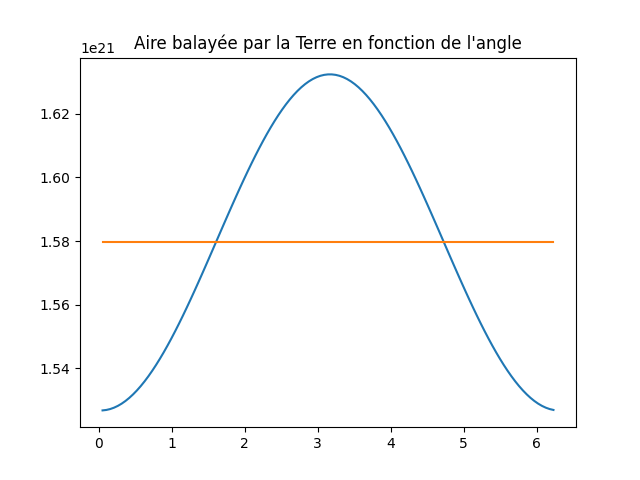

In [7]:
# Aire balayée

%matplotlib ipympl

fig, ax = plt.subplots()
ax.set_title("Aire balayée par la Terre en fonction de l'angle")

d_ES = np.sqrt(x_E**2 + y_E**2)

A_balayee_ES = np.array([(d_ES[i-1] * d_ES[i] * np.sin(ANGLE_STEP)) / 2 for i in range(1, len(d_ES))])

plt.plot(angle[1:], A_balayee_ES)
plt.plot(angle[1:], A_balayee_ES.mean() * np.ones(angle.size - 1))

plt.show()

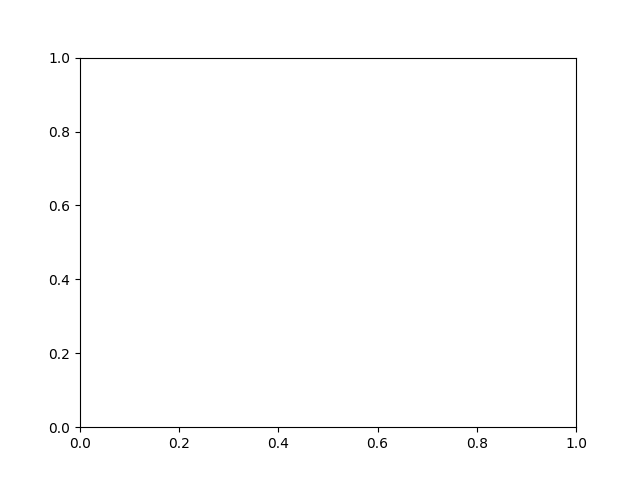

In [8]:
# Aire balayée totale

%matplotlib ipympl

fig, ax = plt.subplots()

#A_balayee_total_ES = 

plt.show()